In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('Air_Quality.csv')

In [ ]:
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,06/01/2020,28.70,NaN
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,06/01/2020,29.56,NaN
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,06/01/2020,29.65,NaN
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,06/01/2020,29.28,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16122 non-null  int64  
 1   Indicator ID    16122 non-null  int64  
 2   Name            16122 non-null  object 
 3   Measure         16122 non-null  object 
 4   Measure Info    16122 non-null  object 
 5   Geo Type Name   16122 non-null  object 
 6   Geo Join ID     16122 non-null  int64  
 7   Geo Place Name  16122 non-null  object 
 8   Time Period     16122 non-null  object 
 9   Start_Date      16122 non-null  object 
 10  Data Value      16122 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

ARIMA MSE: 85.88921823662609


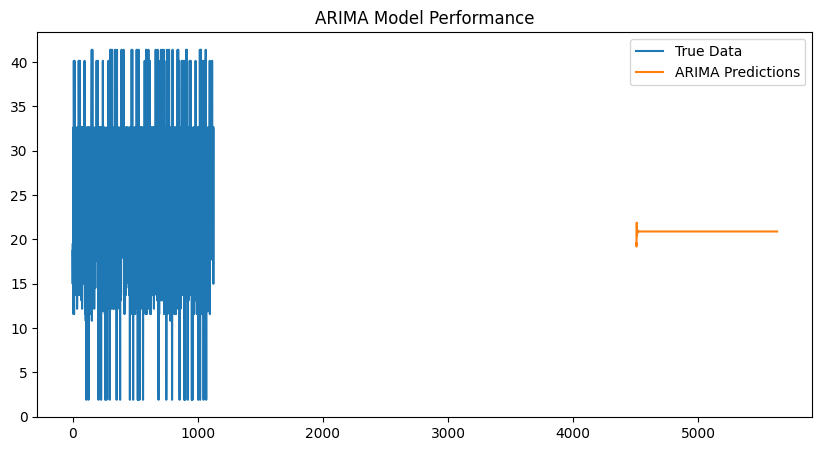

<ipython-input-1-10d08312860e>:67: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(X_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have t

Epoch 0 Loss: 454.0779724121094 Test Loss: 359.79827880859375
Epoch 10 Loss: 71.52806854248047 Test Loss: 82.9334487915039
Epoch 20 Loss: 77.94108581542969 Test Loss: 82.64877319335938
Epoch 30 Loss: 85.80509948730469 Test Loss: 82.64137268066406
Epoch 40 Loss: 43.487552642822266 Test Loss: 82.61637878417969
Epoch 50 Loss: 54.730350494384766 Test Loss: 82.74861907958984
Epoch 60 Loss: 52.967857360839844 Test Loss: 82.7015151977539
Epoch 70 Loss: 127.04119873046875 Test Loss: 82.5389633178711
Epoch 80 Loss: 34.60002517700195 Test Loss: 82.65058135986328
Epoch 90 Loss: 92.14999389648438 Test Loss: 82.46675872802734


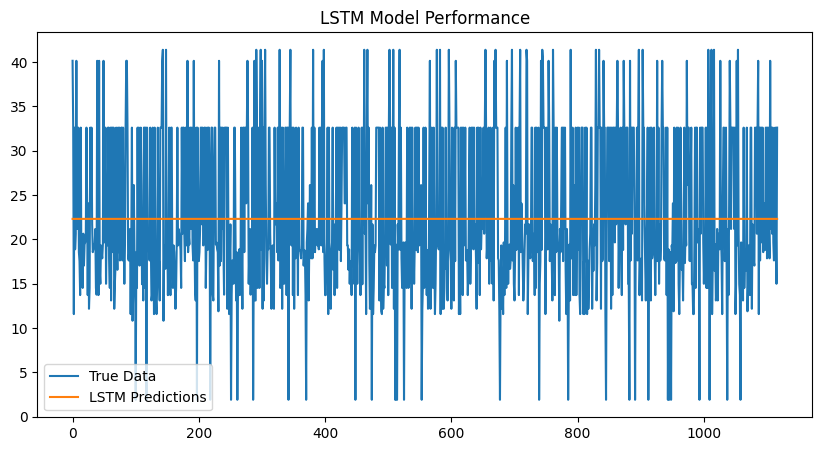

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Load the dataset
df = pd.read_csv('Air_Quality.csv')

df = df.dropna(subset=['Data Value'])

df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

df['month'] = df['Start_Date'].dt.month
df['day'] = df['Start_Date'].dt.day
df['hour'] = df['Start_Date'].dt.hour
df['day_of_week'] = df['Start_Date'].dt.dayofweek
df['week_of_year'] = df['Start_Date'].dt.isocalendar().week

df = df.dropna(subset=['Start_Date'])

df = df.drop(columns=['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Message', 'Time Period'])

df = df.set_index('Start_Date').resample('D').mean().reset_index()

df = df.ffill().bfill()

X = df.drop(columns=['Data Value', 'Start_Date'])
y = df['Data Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_model = arima_model.fit()

y_pred_arima = arima_model.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
mse_arima = mean_squared_error(y_test, y_pred_arima)
print(f'ARIMA MSE: {mse_arima}')

joblib.dump(arima_model, 'arima_model.pkl')

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='True Data')
plt.plot(y_pred_arima, label='ARIMA Predictions')
plt.legend()
plt.title('ARIMA Model Performance')
plt.show()

# ----------- LSTM Model (For Multi-Step Predictions) --------------

def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i + seq_length])
        y_seq.append(y[i + seq_length])
    return torch.tensor(X_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)

seq_length = 10

X_train_lstm, y_train_lstm = create_sequences(X_train, y_train.values, seq_length)
X_test_lstm, y_test_lstm = create_sequences(X_test, y_test.values, seq_length)

train_loader = DataLoader(TensorDataset(X_train_lstm, y_train_lstm), batch_size=64, shuffle=True)

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        h0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_layer_size).to(input_seq.device)
        c0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_layer_size).to(input_seq.device)

        lstm_out, _ = self.lstm(input_seq, (h0, c0))
        predictions = self.linear(lstm_out[:, -1])
        return predictions

lstm_model = LSTMModel(input_size=X_train_lstm.shape[2], hidden_layer_size=50, output_size=1, num_layers=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    lstm_model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = lstm_model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        lstm_model.eval()
        with torch.no_grad():
            y_pred_test = lstm_model(X_test_lstm)
            test_loss = criterion(y_pred_test, y_test_lstm)
        print(f'Epoch {epoch} Loss: {loss.item()} Test Loss: {test_loss.item()}')

torch.save(lstm_model.state_dict(), 'lstm_model.pth')

# ----------- LSTM Model Performance Visualization ------------

lstm_model.eval()
with torch.no_grad():
    y_pred_lstm = lstm_model(X_test_lstm).squeeze().numpy()

plt.figure(figsize=(10, 5))
plt.plot(y_test_lstm.squeeze().numpy(), label='True Data')
plt.plot(y_pred_lstm, label='LSTM Predictions')
plt.legend()
plt.title('LSTM Model Performance')
plt.show()



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define GAN components for data imputation and synthetic data generation
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
input_dim = X_train.shape[1]
output_dim = 1
lr = 0.0002
num_epochs = 200

# Initialize models
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(input_dim + output_dim)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

# Prepare data for GAN
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training loop for GAN
for epoch in range(num_epochs):
    for real_data, real_labels in train_loader:
        batch_size = real_data.size(0)

        # Real data
        real_labels = real_labels.view(-1, 1)
        real_input = torch.cat((real_data, real_labels), dim=1)
        real_target = torch.ones(batch_size, 1)

        # Fake data
        noise = torch.randn(batch_size, input_dim)
        fake_labels = generator(noise).detach()
        fake_input = torch.cat((noise, fake_labels), dim=1)
        fake_target = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_input), real_target)
        fake_loss = criterion(discriminator(fake_input), fake_target)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        generated_labels = generator(noise)
        g_input = torch.cat((noise, generated_labels), dim=1)
        g_loss = criterion(discriminator(g_input), real_target)
        g_loss.backward()
        optimizer_G.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

# Save the GAN models
torch.save(generator.state_dict(), 'gan_generator.pth')
torch.save(discriminator.state_dict(), 'gan_discriminator.pth')

# Generate synthetic data
with torch.no_grad():
    synthetic_noise = torch.randn(X_train.shape[0], input_dim)
    synthetic_labels = generator(synthetic_noise).numpy()
    synthetic_data = np.hstack((synthetic_noise.numpy(), synthetic_labels))

# Augment original data with synthetic data
augmented_X_train = np.vstack((X_train, synthetic_data[:, :-1]))
augmented_y_train = np.hstack((y_train, synthetic_data[:, -1]))
